# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [62]:
import pandas as pd
import pickle
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../")
from src import funciones_problemas_regresion as fpr

In [74]:
df =  pd.read_csv("../datos/df_madrid_nonulls_encoded_sinout_estand.csv", index_col=0).reset_index(drop=True)
variable_respuesta = "price"

df.head()
# df = df.drop(columns=[col for col in df.columns if "bathroom" in col or "propertyType" in col])
# df.drop(columns=["exterior_True_standar", "hasLift_standar", "rooms_standar"], inplace=True)
df

,price,size_standar,rooms_standar,bathrooms_standar,municipality_standar,distance_standar,floor_standar,hasLift_standar,propertyType_chalet_standar,propertyType_countryHouse_standar,propertyType_duplex_standar,propertyType_flat_standar,propertyType_penthouse_standar,propertyType_studio_standar,exterior_True_standar
0,750.0,0.169464,-0.549229,-0.295875,0.775807,-0.665728,0.462769,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
1,750.0,0.732599,0.559527,-0.295875,0.206348,0.069560,-0.981618,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
2,590.0,0.732599,1.668282,3.379804,-2.740362,3.335169,-1.609363,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
3,684.0,-0.675240,-1.657984,-0.295875,0.775807,-0.373567,-1.609363,-2.501033,-0.055728,-0.055728,-0.204782,-1.954711,-0.137577,2.453923,0.472742
4,600.0,0.901540,0.559527,-0.295875,-2.565138,1.758189,0.462769,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,640.0,0.676286,0.559527,-0.295875,-1.864241,1.132451,0.344933,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
319,700.0,-0.168418,-0.549229,-0.295875,-0.499320,-0.292837,0.771651,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
320,700.0,0.113150,-0.549229,-0.295875,0.775807,-0.626009,0.449541,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
321,700.0,1.014167,0.559527,-0.295875,-0.035412,1.217056,0.771651,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742


Probaremos varios modelos de ensamble y compararemos sus métricas a ver cual es el que arroja mejores resultados.

## Random Forest Regressor

In [75]:
variable_respuesta = "price"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
X, y = clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [100, 150, 200], #número de árboles que queremos en el bosque
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf':  [5, 10, 15],
    'max_leaf_nodes': [20, 40, 60]
}

df_metricas, modelo_random_forest_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}


,r2_scores,MAE,MSE,RMSE
train,0.414332,28.181553,1297.471497,36.020432
test,0.289053,32.607078,1679.927163,40.986915


In [76]:
pd.DataFrame(modelo_random_forest_1.feature_importances_, columns=["Importancia"], index=X.columns).sort_values(by="Importancia", ascending=False)

,Importancia
municipality_standar,0.487511
size_standar,0.168324
floor_standar,0.141326
distance_standar,0.102874
rooms_standar,0.062388
hasLift_standar,0.016846
exterior_True_standar,0.012659
propertyType_flat_standar,0.007697
propertyType_studio_standar,0.000374
bathrooms_standar,0.000000


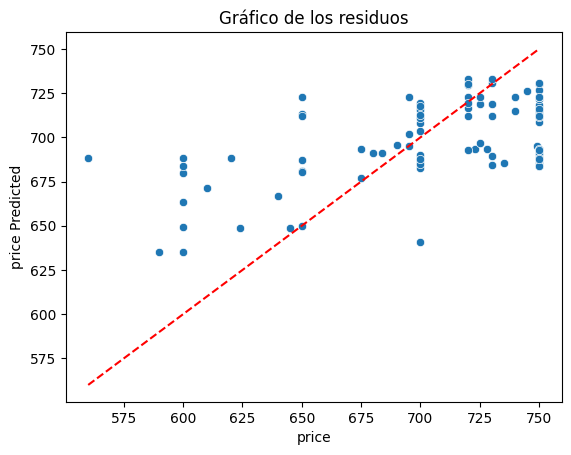

In [77]:
clase_arbol.visualizacion_residuos()

## Gradient Boosting Regressor

In [45]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'max_depth': [4, 5, 6],
    'max_leaf_nodes': [40, 45, 50],
    'min_samples_leaf': [4, 5, 6],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [60, 65, 70] #número de árboles que queremos en el bosque
}

df_metricas, modelo_grad_boosting_1 = clase_arbol.grid_search(params_rf, cv=5)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 4, 'max_leaf_nodes': 40, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 60}


,r2_scores,MAE,MSE,RMSE
train,0.761315,18.040868,528.776160,22.995133
test,0.165961,33.474211,1970.787451,44.393552


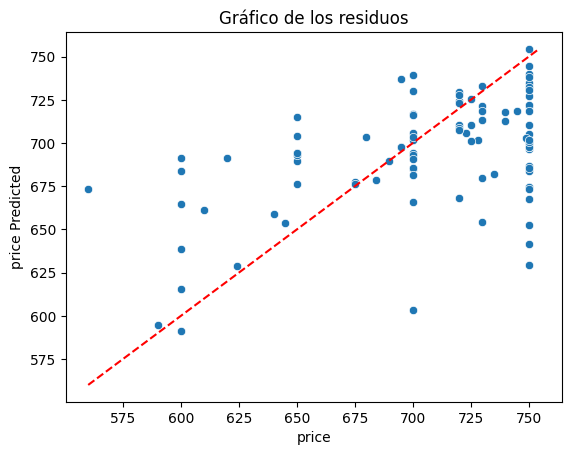

In [46]:
clase_arbol.visualizacion_residuos()

In [24]:
pd.DataFrame((df.describe().T).iloc[0,:]).T

,count,mean,std,min,25%,50%,75%,max
price,339.0,692.377581,61.804274,400.0,650.0,700.0,740.0,750.0


In [27]:
error = round(100*54/700, 2)
print(f"Nos estamos confundiendo de media en un {error}% al estimar el precio del alquiler de la vivienda, tomando de referencia la mediana.")

Nos estamos confundiendo de media en un 7.71% al estimar el precio del alquiler de la vivienda, tomando de referencia la mediana.


In [28]:
with open('../datos/modelos/modelo_grad_boosting.pkl', 'wb') as f:
    pickle.dump(modelo_grad_boosting_3, f)

# XGBRegressor

Probaremos este modelo de predicción simplemente por comprobar qué métricas nos da, aunque las obtenidas anteriormente ya sean suficientemente buenas.

In [47]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 60, 'subsample': 0.8}


,r2_scores,MAE,MSE,RMSE
train,0.645752,21.829656,784.790281,28.014109
test,0.276048,32.508863,1710.657721,41.360098


_______________________________

# Modelo final

Ahora vamos a entrenar a nuestro modelo con todos los datos:

In [33]:
with open('../datos/modelos/modelo_grad_boosting.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)

X  = df.drop(columns=variable_respuesta)
y = df[[variable_respuesta]]
modelo_cargado.fit(X, y)

GradientBoostingRegressor(max_depth=4, max_leaf_nodes=20, min_samples_leaf=6,
                          min_samples_split=3, n_estimators=60,
                          random_state=42)

In [34]:
y_train_pred = modelo_cargado.predict(X)
r2 = round(r2_score(y,  y_train_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y,  y_train_pred)), 2)
print(f"Tenemos un r2 score de {r2} y un RMSE de {rmse}.")

Tenemos un r2 score de 0.78 y un RMSE de 29.04.


In [35]:
with open('../datos/modelos/modelo_prediccion_final.pkl', 'wb') as f:
    pickle.dump(modelo_cargado, f)